# **FDS/IDS 2025/2026**
Department of Computer Science, Faculty of Sciences, University of Porto

**Practical #3**

In this class we will get acquainted with **distance metrics**, **entropy** and **information**. You will have a chance of implementing these metrics yourself and using the same metrics as implemented by `python` libraries.


> Nota: diferentes métodos de distância para os mesmos dois pontos podem dar valores diferentes

In [5]:
# Enable autocomplete
%config IPCompleter.greedy=True

## Part 1

Let's start with a basic dataset with features of the same type and a class variable which is nominal, the iris dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The iris dataset contains a list of 150 observations of plants that fall into three categories: setosa, virginica and versicolor. Each of these categories has 50 representative plants in this dataset. The features annotated for each plant category are `sepal_length`, `petal_length`, `sepal_width` and `petal_width`.

Calculate distances among these features, and among the objects of each category. Also calculate correlation among the features and mutual information (entropy) between each feature and the category.

### Distance functions 

In [8]:
"""
 For Distance among the features: 
    A and B are the feature (columns) vectors

 For Distance among Objects:
     A and B are the object vectors  (plants)

  Valid values for distance_method: { euclidean |  manhattan | minkowski }

  There are more distances methods, but i only did this ones 
"""
def calculate_distance_matrix(data_matrix,distance_method): 
    """Calculate the Euclidian distance matrix between records"""
    n = data_matrix.shape[0]
    dist_matrix = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            # A and B are the feature (columns) vectors
            
            A = data_matrix[i]
            B = data_matrix[j]
            dist = -1
            if (distance_method == "euclidean"):
                dist = np.sqrt(np.sum((A-B) ** 2))
            elif (distance_method == "manhattan"): 
                dist = np.sum(np.abs(A-B))
            elif (distance_method == "minkowski"): 
                r = 2 
                dist = np.power(np.sum(np.power(np.abs(A-B),r)), 1/r)
            dist_matrix[i,j] = dist
            
    return dist_matrix


### Plot functions 

In [72]:
"""
Makes a visual representantion of how diferent are the objects in the distance
matrix. This way is easier to observer the following aspects:

    Group Homogeneity: If the map is uniform or has a darker color (less Dissimilarity)
    the objects are similar. For example, in the case of the iris dataset, the euclidian 
    distance matrix of the Setosa plants generates a more uniform and darker 
    heat map, sugesting  that the objects of this dataset (plants) are similar.
    For the other species the heatmap sugestes that the objects (plants) in that
    species less similar

    Identifying the outliers: If the map has light spots or lines (more Dissimilarity,
    it means that those objects probabily are a outlier.
"""
def plot_distance_heat_map(distance_matrix,name):
    plt.figure(figsize=(5, 4)) 
    plt.title('Heat Map of Distances between ' + name + ' plants (Normalize Dta)', fontsize=10)
    sns.heatmap(
        distance_matrix, 
        annot=False,    
        cmap="viridis",
        cbar_kws={'label': 'Euclidian Distance (Dissimilarity)'}
    )
    plt.xlabel('Plant J (Index 0 a 49)')
    plt.ylabel('Plant I (Index 0 a 49)')
    plt.show()

"""
Makes a Heat map of distance matrix and indicates de type of distance method used  
"""
def plot_distance_heat_map_p2(distance_matrix,type_distance): 
    plt.figure(figsize=(7, 4)) 
    plt.title('Heat map for distance between Normalized Features', fontsize=10)
    sns.heatmap(
        distance_matrix, 
        annot=True,     # Mostrar os números das distâncias (crucial aqui)
        cmap='viridis', # 'viridis' ou 'plasma' são boas opções para distâncias
        fmt=".2f",      # Formatação com 2 casas decimais
        linewidths=.5,  # Linhas brancas para separar as células
        cbar_kws={'label': type_distance + " distance"}
    )
    plt.show()

def plot_distance_heat_map_p3(distance_matrix,type_distance): 
    plt.figure(figsize=(7, 4)) 
    plt.title('Heat map for distance between Normalized Objects', fontsize=10)
    sns.heatmap(
        distance_matrix, 
        annot=False,     # Mostrar os números das distâncias (crucial aqui)
        cmap='viridis', # 'viridis' ou 'plasma' são boas opções para distâncias
        fmt=".2f",      
        linewidths=.5,  
        cbar_kws={'label': type_distance + " distance"}
    )
    plt.show()

"""
Makes a plot map for observing a correlation matrix 
"""
def plot_correlation_heat_map(correlation_matrix): 
    plt.figure(figsize=(5, 4)) 
    plt.title('Heat map of Pearson correlation', fontsize=10)
    sns.heatmap(
        correlation_matrix, 
        annot=True,     
        cmap='coolwarm',# map color that distinguishes well positive/negative
        fmt=".2f",      
        linewidths=.5,  
        cbar_kws={'label': 'Correlation Coeficient'}
    )

    plt.show()

### Normalization 

In [77]:
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
normalized_df = iris.copy(deep=True)
scaler = StandardScaler()
normalized_df[col_names] = scaler.fit_transform(normalized_df[col_names])

### Distance among the Features (With normalization)

| O que Compara?  | Pergunta respondida |  Para que Serve?    |
|-------|-----|-------|
| As Features (e.g. petal_length vs. sepal_width). | Quão semelhantes são os padrões de medição de duas features ao longo de todos os objetos ?  | Identificar Redundância no Padrão. Distância baixa sugere que os objetos  comportam-se de forma muito parecida. Distância grande sugere que os objetos comportam-se de forma diferente |

* **Principal aplicação**
    * É uma métrica alternativa para a Correlação.
    * É útil para **Principal Component Analasys (PCA)** ou para **pré processamento de dados**.


> Neste caso o obetivo é Comparar a feature A (ex: sepal_length) com a feature B (ex: petal_width).

> ![image.png](./img/image.png)





#### Notes about distance (in general)

* Análise de Dados: Num conjunto de dados, cada observação (linha) ou cada característica (coluna) é um ponto num espaço multidimensional. A **Distância** mede a **dissimilaridade entre dois desses pontos**.
    * ```Valor Baixo```: Os pontos são muito semelhantes ou próximos.
        * A Distância Baixa **sugere** que as **features variam de forma semelhante** e **provavelmente têm uma forte correlação positiva**. 
    * ```Valor Alto```: Os pontos são muito diferentes ou distantes.
* Neste exemplo, se a **distância** entre duas features: 
    * e.g. **petal_length** e **petal_width**
        * For **baixa**: Estas duas features variam de forma muito semelhante ao longo das 150 plantas. Se uma é grande, a outra tende a ser grande.
    * e.g. **petal_length** e **sepal_width**
        * For **alta**: Os padrões de variação são muito diferentes. Não há uma relação clara de "proximidade" nos valores entre as 150 plantas. 

#### Euclidian distance (Feature distance matrix)

In [74]:
# 1. Load and prepare data 
X = normalized_df.drop(columns=["species"])

# 2. Transpose matrix to make each line represents the respective values of a
# feature. A nova matriz tem o formato: (4 linhas de features, 150 colunas
# de amostras). Aqui é precisso transpor (ver figura acima para perceber)
X_features = X_scaled.T

# 3. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"euclidean")

# 4. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=features_names)

print("Euclidian distance matrix")
print(distance_df)

Euclidian distance matrix
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.000000    18.310405      6.202731     7.390376
sepal_width      18.310405     0.000000     20.701015    20.244451
petal_length      6.202731    20.701015      0.000000     3.337719
petal_width       7.390376    20.244451      3.337719     0.000000


#### Manhattan distance (Feature distance matrix)

In [82]:
# 1. Load and prepare data 
X = normalized_df.drop(columns=["species"])

# 2. Transpose matrix to make each line represents the respective values of a
# feature. A nova matriz tem o formato: (4 linhas de features, 150 colunas
# de amostras). Aqui é precisso transpor (ver figura acima para perceber)
X_features = X_scaled.T

# 3. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"manhattan")

# 4. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=features_names)

print("Manhattan distance matrix")
print(distance_df)

Manhattan distance matrix
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.000000   191.483540     62.268537    72.164837
sepal_width     191.483540     0.000000    217.788913   214.744572
petal_length     62.268537   217.788913      0.000000    31.194972
petal_width      72.164837   214.744572     31.194972     0.000000


#### Minkowski distance (Feature distance matrix)

In [83]:
# 1. Load and prepare data 
X = normalized_df.drop(columns=["species"])

# 2. Transpose matrix to make each line represents the respective values of a
# feature. A nova matriz tem o formato: (4 linhas de features, 150 colunas
# de amostras). Aqui é precisso transpor (ver figura acima para perceber)
X_features = X_scaled.T

# 3. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"minkowski")

# 4. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=features_names)

print("Minkowski distance matrix")
print(distance_df)

Minkowski distance matrix
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.000000    18.310405      6.202731     7.390376
sepal_width      18.310405     0.000000     20.701015    20.244451
petal_length      6.202731    20.701015      0.000000     3.337719
petal_width       7.390376    20.244451      3.337719     0.000000


### Distance among Objects in certain species (With normalization)

| O que Compara?  | Pergunta respondida |  Para que Serve?    |
|-------|-----|-------|
| Os Objetos (e.g:(as plantas) dentro de cada espécie, Planta Setosa A  vs. Planta Setosa B). | Quão homogêneo (compacto) ou heterogêneo (espalhado) são os objetos (e.g. quão espalhado é o grupo de plantas de uma determinada espécie?) | Avaliar a Variabilidade Interna. (e.g. Permite comparar a coesão das  espécies. Uma média de distância baixa indica um grupo compacto (ex: Setosa)).|


* **Principal aplicação**
    * Fundamental para **Algoritmos de Clustering** (como K-Means) e para **Identificação de Outliers**  dentro de um grupo.

> Neste caso o objetivo é comparar a Planta i com a Planta j.

> ![image.png](./img/image-1.png)

#### Euclidian distance (Object distance matrix, in certain species)

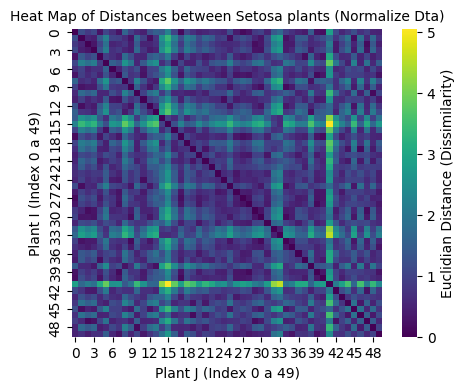

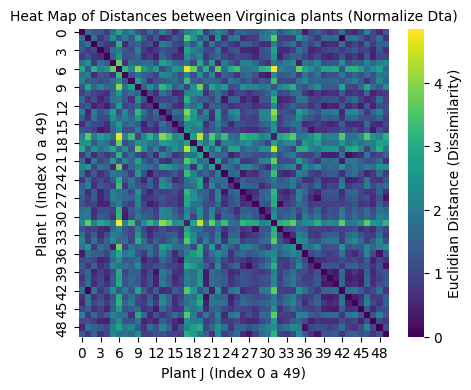

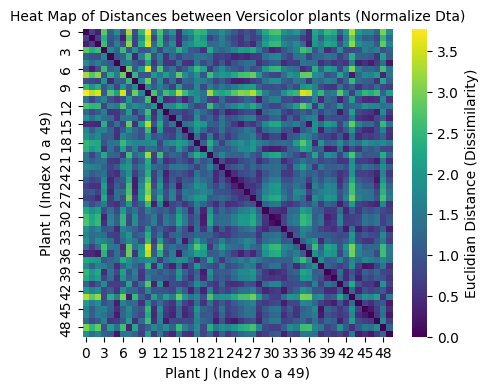

In [75]:
# 1. Isolate data from each species 
X_setosa = normalized_df[normalized_df["species"] == "setosa"].drop(columns="species").values
X_virginica = normalized_df[normalized_df["species"] == "virginica"].drop(columns="species").values
X_versicolor = normalized_df[normalized_df["species"] == "versicolor"].drop(columns="species").values

# 3. Calculate the euclidian matrix 
distance_matrix_setosa = calculate_distance_matrix(X_setosa,"euclidean")
distance_matrix_virginica = calculate_distance_matrix(X_virginica,"euclidean")
distance_matrix_versicolor = calculate_distance_matrix(X_versicolor,"euclidean")

# 4. Make a graphical visualization of each matrix (to facilatate visualization)
plot_distance_heat_map(distance_matrix_setosa,"Setosa")
plot_distance_heat_map(distance_matrix_virginica,"Virginica")
plot_distance_heat_map(distance_matrix_versicolor,"Versicolor")


#### Manhattan distance (Object distance matrix, in certain species)

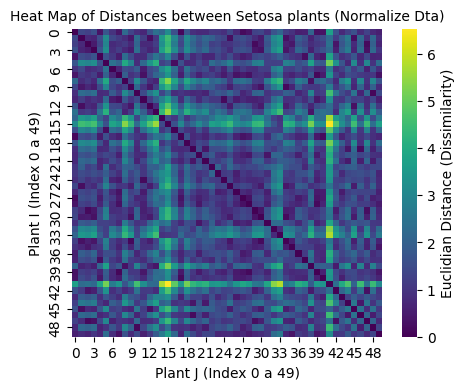

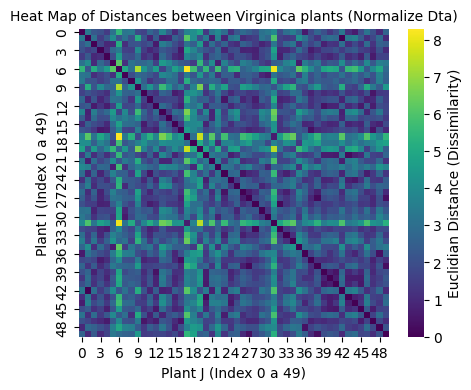

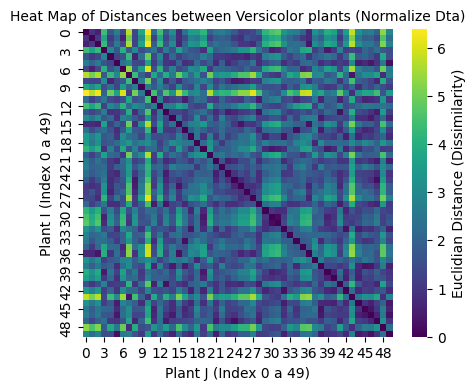

In [84]:
# 1. Isolate data from each species 
X_setosa = normalized_df[normalized_df["species"] == "setosa"].drop(columns="species").values
X_virginica = normalized_df[normalized_df["species"] == "virginica"].drop(columns="species").values
X_versicolor = normalized_df[normalized_df["species"] == "versicolor"].drop(columns="species").values

# 3. Calculate the euclidian matrix 
distance_matrix_setosa = calculate_distance_matrix(X_setosa,"manhattan")
distance_matrix_virginica = calculate_distance_matrix(X_virginica,"manhattan")
distance_matrix_versicolor = calculate_distance_matrix(X_versicolor,"manhattan")

# 4. Make a graphical visualization of each matrix (to facilatate visualization)
plot_distance_heat_map(distance_matrix_setosa,"Setosa")
plot_distance_heat_map(distance_matrix_virginica,"Virginica")
plot_distance_heat_map(distance_matrix_versicolor,"Versicolor")

#### Minkowski distance (Object distance matrix, in certain species)

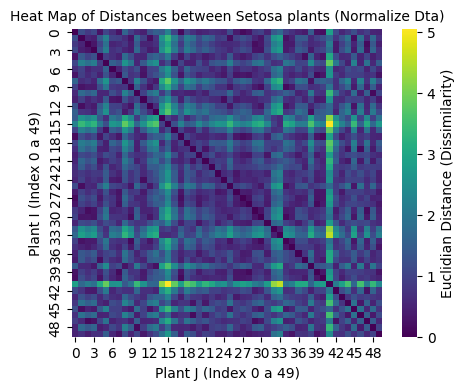

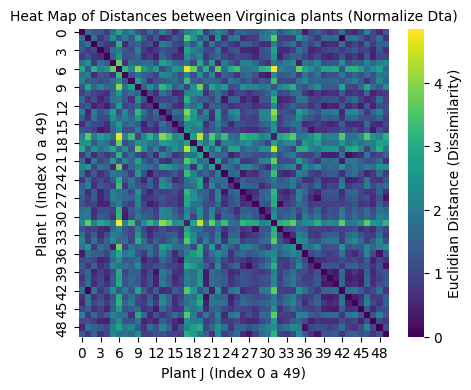

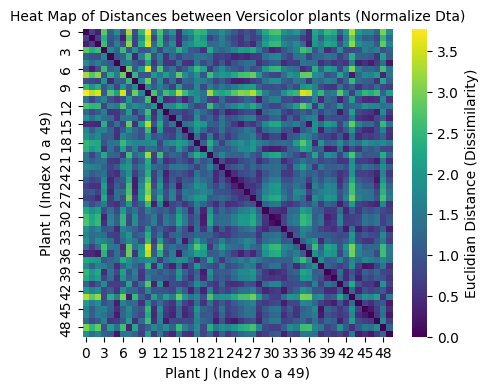

In [85]:
# 1. Isolate data from each species 
X_setosa = normalized_df[normalized_df["species"] == "setosa"].drop(columns="species").values
X_virginica = normalized_df[normalized_df["species"] == "virginica"].drop(columns="species").values
X_versicolor = normalized_df[normalized_df["species"] == "versicolor"].drop(columns="species").values

# 3. Calculate the euclidian matrix 
distance_matrix_setosa = calculate_distance_matrix(X_setosa,"minkowski")
distance_matrix_virginica = calculate_distance_matrix(X_virginica,"minkowski")
distance_matrix_versicolor = calculate_distance_matrix(X_versicolor,"minkowski")

# 4. Make a graphical visualization of each matrix (to facilatate visualization)
plot_distance_heat_map(distance_matrix_setosa,"Setosa")
plot_distance_heat_map(distance_matrix_virginica,"Virginica")
plot_distance_heat_map(distance_matrix_versicolor,"Versicolor")

### Feature Correlation (With normalization)

* A **correlação** mede a **relação linear entre duas features**.
    * Responde à pergunta: "Se uma feature aumenta, a outra também aumenta, ou diminui?"

| Coeficiente    | Relação | Interpretação no Iris	| Para que serve? |
| -------- | ------- | -------|  -------|
| Perto de +1 | Correlação Positiva Forte | Se o petal_length é grande, o petal_width também é grande. | Identificar Redundância. Features com alta correlação (ex: 0.95) estão a fornecer a mesma informação.| 
| Perto de -1 | Correlação Negativa Forte |Se o sepal_length for grande, o sepal_width tende a ser pequeno (situação rara no Iris, mas comum em outros dados). | Identificar Relações Inversas. | 
| Perto de 0  | Correlação Fraca ou Nula | Não há relação previsível. O valor de uma feature não diz nada sobre o valor do outro. | Identificar features Independentes. |

* **Principal Aplicação**: Na análise de dados e Machine Learning, a correlação forte indica que poderá **remover uma dos features** (por exemplo, remover petal_length e manter petal_width) **sem perder muita informação, simplificando o modelo**.


In [79]:
# 1. Get the 4 columns were data is numerical (we can only aply correlation
# to numerical values)
features_df = normalized_df[col_names]

# 2. use correlation function of pandas to calculate correlatio using pearson method
correlation_matrix = features_df.corr(method='pearson')

# 3. print the correlation matrix 
print(correlation_matrix.round(3))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length         1.000       -0.118         0.872        0.818
sepal_width         -0.118        1.000        -0.428       -0.366
petal_length         0.872       -0.428         1.000        0.963
petal_width          0.818       -0.366         0.963        1.000


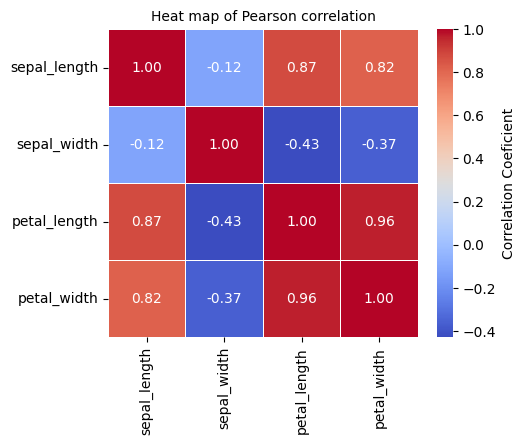

In [80]:
# 4. For visualizing correlation matrix with heat_map
plot_correlation_heat_map(correlation_matrix)

### Mutual information (entropy) between each feature and the category.

 * **Mutual information**  é um conceito da teoria da informação que **mede a dependência estatística entre duas variáveis**
     * De forma simples, é a informação que uma varíavel dá sobre outra
     * Formalmente:

$$I(X,Y) = H(X) + H(Y) - H(X,Y)$$

$$ H(X,Y) = - \sum_{x \in X}\sum_{y \in Y} p(x,y) \log_2 p(x,y) $$

* Onde **p(x,y)** é a **probabilidade do valor x de X e o valor de Y ocorrem juntos**

* Para **valores discretos** é facil de "computar"
    	* **Mutual information** máxima para valores discretos é log2 (min(nx,ny)), onde nx(ny) é o número de valores distintos de X(Y)

> ```Nota importante```: Quanto **maior** for o **valor da Mutual Information I(X,Y)**, **mais útil é a feature (X)** para **classificar** ou **prever** a **target feature (Y)**.


| Variável  | Papel Universal |  Papel no dataset Iris    |
|-------|-----|-------|
| X | Numeric Feature | Representa uma ou mais Features numéricos (as colunas de medição). |
| Y   | Target Feature  | Representa a Target Feature ou Classe que  queremos prever (a coluna species)   |


In [81]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


# 1. Prepare data 
X = normalized_df[col_names] # X: Features (numeric data)
y = normalized_df['species'] # y: target feature (species)

# 3. Encode categorical variavel 
# Mutual Information needs the feature variable to be numeric 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4.  Calculate Mutual Information 
#  'mutual_info_classif' estimates Mutual info between  features and Target feature.
#   random_state=42 garantes that the  results won't randomly change.
mi_scores = mutual_info_classif(X,y_encoded,random_state=42)


# 5. Present results  
mi_series = pd.Series(mi_scores,index=col_names)
mi_series = mi_series.sort_values(ascending=False)


print("--- 4. Mutual information (Relevance to category) ---")
print("The bigger the value, the more useful is the feature to classify the specie")
print(mi_series.round(4))


--- 4. Mutual information (Relevance to category) ---
The bigger the value, the more useful is the feature to classify the specie
petal_length    0.9926
petal_width     0.9856
sepal_length    0.5114
sepal_width     0.2994
dtype: float64


* Com o resultado de cima, vemos que **petal_length** é a feature que melhor permite classificar a especie de uma planta.Enquanto que **sepal_with** é a pior feature para classificação. 

## Part 2

In this next set of exercises, you will be using the same dataset of last practical class, `SAheart.csv`, but you can add any dataset you like.

In [52]:
import pandas as pd
mydata = pd.read_csv('DataSets/SAheart.csv')

Let's inspect again the contents of this file...

In [2]:
pd.set_option("display.max_rows",None)

In [11]:
mydata.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [4]:
mydata.describe(include="all")

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462,462.000000,462.000000,462.000000,462.000000,462
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Absent,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,NaN,302
mean,138.326840,3.635649,4.740325,25.406732,NaN,53.103896,26.044113,17.044394,42.816017,NaN
std,20.496317,4.593024,2.070909,7.780699,NaN,9.817534,4.213680,24.481059,14.608956,NaN
min,101.000000,0.000000,0.980000,6.740000,NaN,13.000000,14.700000,0.000000,15.000000,NaN
25%,124.000000,0.052500,3.282500,19.775000,NaN,47.000000,22.985000,0.510000,31.000000,NaN
50%,134.000000,2.000000,4.340000,26.115000,NaN,53.000000,25.805000,7.510000,45.000000,NaN
75%,148.000000,5.500000,5.790000,31.227500,NaN,60.000000,28.497500,23.892500,55.000000,NaN


Recall that this dataset has different types of variables (for example, `famhist` is **categorical**, `age` is **integer** and `ldl` is **floating point** (continuous).

Let's recall its variables.

The class label indicates if the person has a coronary heart disease: negative (`No`) or positive (`Si`).

Attributes description:
- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low density lipoprotein cholesterol
- adiposity
- famhist: family history of heart disease (Present, Absent)
- typea: type-A behavior
- obesity
- alcohol: current alcohol consumption
- age: age at onset

For this dataset, calculate distances between each pair of **features** and mean distances among **objects** of class 'Si' and of class 'No'.

1.   How would you **calculate distances between variables (features) that have different types**?

> R: Não pode usar uma única fórmula (como Euclidiana ou Manhattan) diretamente em dados mistos. Existe duas abordagens principais para lidar com a presença de tipos dados diferentes, esses abordagens são: 

>* **Data transformation**: Fazer com que todas as variáveis estejam num formato compátivel, para poder aplicar a distância.

| Tipo de variável Original  | Tranformação necessária | Método de Distância Pós-Transformação|
| :---------------- | :------: | ----: |
| Numérica Contínua        |   Normalização/Standardização (Para evitar que variáveis com valores maiores dominem o cálculo).   | Euclidiana, Manhattan, etc |
| Categórica Ordinal (Ex: "Pequeno", "Médio", "Grande")   |   Codificação Numérica (0, 1, 2)   | Euclidiana, Manhattan, etc. |
|Categórica Nominal (famhist: Present/Absent)    |  One-Hot Encoding    | Euclidiana, Manhattan, etc. (Onde a distância torna-se uma forma de calcular a diferença no conjunto binário). |
  
>* **Hybrid distance methods**: por exemplo **Distância de Gower**nque calcula a Dissimilarity  para cada tipo de variável separadamente e depois combina os resultados através de uma média ponderada.

3.   How would you calculate distances for objects whose features can vary in type?

> R: Não se pode aplicar diretamente a Distância Euclidiana ou Manhattan. A **solução** passa por **separar o cálculo por tipo de variável** e **depois combinar as distâncias**.A metodologia mais robusta para **calcular distâncias em datasets de tipo misto** podemos usar a ```Distância de Gower```.

4.   Do you see any difference between group 'Si' and group 'No' regarding their mean distance among objects?

> R: (esta mais em baixo)
   
Practice also with correlation and entropy among the features.



### Data transformation

#### 1. Normalization

In [53]:
# Normalize numeric features 
col_names = ["sbp", "tobacco", "ldl", "adiposity","typea","obesity","alcohol","age"]
scaler = StandardScaler()
mydata[col_names] = scaler.fit_transform(mydata[col_names])

#### 2. Encode 

In [54]:
# Encode categorical data 

# For famhist:  1 = 'Present' and 0 = 'Absent')
mydata['famhist'] = (mydata['famhist'] == 'Present').astype(int)
# For chd: 1 = 'Si' and 0 = 'No'
mydata['chd'] = (mydata['chd'] == 'Si').astype(int)

In [55]:
mydata.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,1,-0.418470,-0.176786,3.277738,0.629336,1
1,0.277089,-0.790237,-0.159680,0.412140,0,0.193344,0.671373,-0.612745,1.383115,1
2,-0.992806,-0.774980,-0.609245,0.884332,1,-0.112563,0.735519,-0.541183,0.218184,0
3,1.546985,0.842264,0.807126,1.624141,1,-0.214532,1.412621,0.295062,1.040488,1
4,-0.211332,2.171805,-0.599577,0.305351,1,0.703189,-0.012856,1.647775,0.423760,1


### Distance among the Features (With normalization)

#### Notes about distance (in general)

* Análise de Dados: Num conjunto de dados, cada observação (linha) ou cada característica (coluna) é um ponto num espaço multidimensional. A **Distância** mede a **dissimilaridade entre dois desses pontos**.
    * ```Valor Baixo```: Os pontos são muito semelhantes ou próximos.
        * A Distância Baixa **sugere** que as **features variam de forma semelhante** e **provavelmente têm uma forte correlação positiva**. 
    * ```Valor Alto```: Os pontos são muito diferentes ou distantes.


#### Euclidian Distance

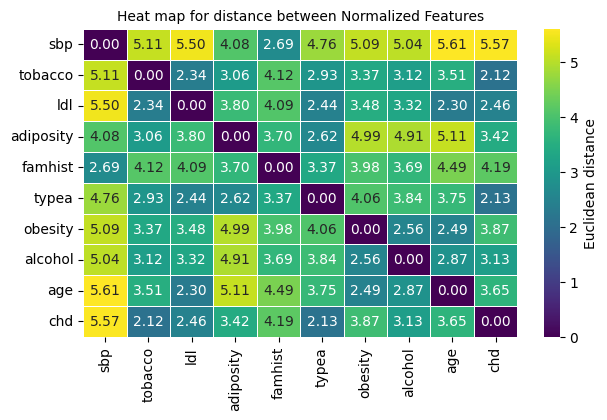

In [41]:
col_names = mydata.columns
# 1. Transpose matrix to make each line represents the respective values of a
# feature. 
X_features = mydata.T

# 2. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"euclidean")

# 3. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=col_names)

# 4. Plot heat map 
plot_distance_heat_map_p2(distance_df,"Euclidean")

#### Manhattan Distance

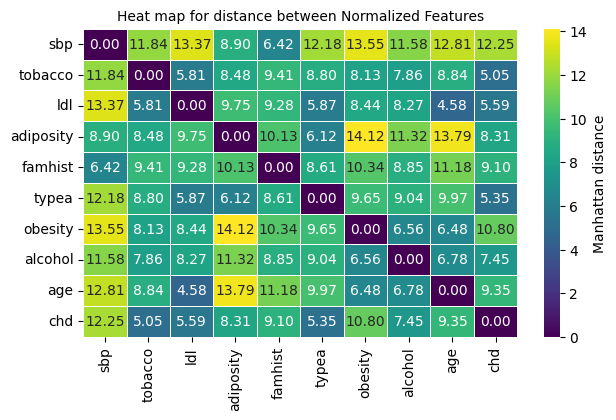

In [43]:
col_names = mydata.columns
# 1. Transpose matrix to make each line represents the respective values of a
# feature. 
X_features = mydata.T

# 2. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"manhattan")

# 3. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=col_names)

# 4. Plot heat map 
plot_distance_heat_map_p2(distance_df,"Manhattan")

#### Minkowski Distance

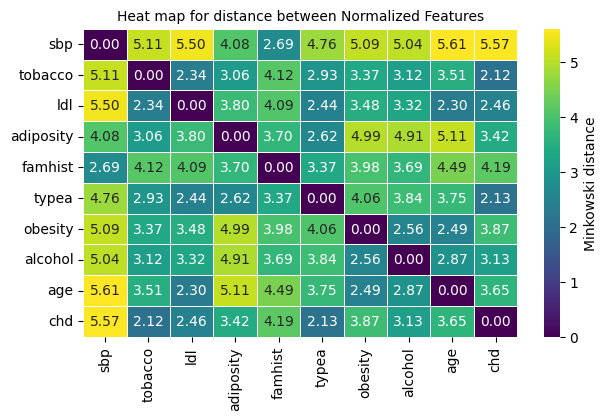

In [45]:
col_names = mydata.columns

# 1. Transpose matrix to make each line represents the respective values of a
# feature.
X_features = mydata.T

# 2. Calculate euclidan distance matrix 
distance_matrix = calculate_distance_matrix(X_features,"minkowski")

# 3. Present result in dataframe to have better reading
distance_df = pd.DataFrame(distance_matrix,columns=col_names,index=col_names)

# 4. Plot heat map 
plot_distance_heat_map_p2(distance_df,"Minkowski")

### Mean distances among objects of class 'Si' and of class 'No'

| Métrica              | Nome Alternativo | O que Mede | Interpretação Ideal (Bom Resultado) |
| :---------------- | :------: | :----: | :----: |
| Distância INTRA-CLASSES  |   **COESÃO** (<ins>Dentro do Grupo<ins>)   | A distância média entre todos os pares de objetos (pacientes no caso do dataset SAheart) que pertencem à mesma classe (neste caso: 'Si' vs. 'Si', ou 'No' vs. 'No'). | **Valor Baixo** : Significa que os **objetos** (pacientes no caso do dataset SAheart) dentro do **grupo são homogéneos e muito parecidos entre si**. |
| Distância INTER-CLASSES           |   SEPARAÇÃO (<ins>Entre Grupos<ins>)   | A distância média entre todos os pares de objetos onde um pertence à Classe A e o outro pertence à Classe B (neste caso: 'Si' vs. 'No'). | **Valor Alto**: Significa que os grupos são **bem distinguíveis** e há um grande espaço entre eles. |


#### Euclidian distance

In [96]:
from scipy.spatial.distance import pdist, cdist, squareform

# 1. Isolate data from each class 
X_si = mydata[mydata["chd"] == 1].values
X_no = mydata[mydata["chd"] == 0].values


# 1. Inter class distance (SEPARATION)
# Calcula a distância entre CADA paciente em X_si e CADA paciente em X_no.
# É uma matriz N_si x N_no de distâncias.
inter_class_distances = cdist(X_si, X_no, metric='euclidean')

# Calculates the mean of all Inter class distances
mean_inter_class_distance = np.mean(inter_class_distances)


# 2. Distance Intra class (COESION)

# A. Para a Classe 'Si' (Coesão)
# pdist calcula a distância entre todos os pares ÚNICOS dentro de X_si,
# retornando um vetor triangular superior.
intra_si_vector = pdist(X_si, metric='euclidean')
mean_intra_si_distance = np.mean(intra_si_vector)

# B. Para a Classe 'No' (Coesão)
# Repete o processo para a classe 'No'
intra_no_vector = pdist(X_no, metric='euclidean')
mean_intra_no_distance = np.mean(intra_no_vector)


# 3. Present results 
print("--- Análise de Distância (Euclidiana) Média por Classe ---")
print("-" * 50)
print(f"Número de pacientes 'Si': {X_si.shape[0]}")
print(f"Número de pacientes 'No': {X_no.shape[0]}")
print("-" * 50)
print("\n2. Distâncias INTRA-CLASSES (Coesão)")
print(f"Média 'Si' vs 'Si': {mean_intra_si_distance:.4f}")
print(f"Média 'No' vs 'No': {mean_intra_no_distance:.4f}")
print("-" * 50)
print("1. Distância INTER-CLASSES (Separação)")
print(f"Média 'Si' vs 'No': {mean_inter_class_distance:.4f}")
print("-" * 50)


--- Análise de Distância (Euclidiana) Média por Classe ---
--------------------------------------------------
Número de pacientes 'Si': 160
Número de pacientes 'No': 302
--------------------------------------------------

2. Distâncias INTRA-CLASSES (Coesão)
Média 'Si' vs 'Si': 4.0048
Média 'No' vs 'No': 3.6121
--------------------------------------------------
1. Distância INTER-CLASSES (Separação)
Média 'Si' vs 'No': 4.1716
--------------------------------------------------


* **Conclusão** sobre a **Coesão** (dos dados obtidos na celula anterior)
    * O grupo 'No' é significativamente mais coeso (os pacientes sem doença são mais parecidos entre si) do que o grupo 'Si'.
    * A maior dispersão do grupo 'Si' (4.0048) sugere que pode haver subtipos de pacientes com a doença, ou que as features que estamos a usar não conseguem definir um perfil único para a doença.

* **Conclusão** sobre a **Separação**
    * **D_Inter(4.1716)** é apenas **ligeiramente maior** do que **D_Intra,Si(4.0048)**
* Isto implica que:
    * **Baixa Clareza de Separação**
        * Os grupos 'Si' e 'No' estão **muito próximos no espaço das features**.
        * A **distância** entre um **paciente doente** e um **paciente saudável** (**4.17**) é apenas **um pouco maior** do que a **distância entre dois pacientes doentes** (**4.00**).
    * **Mistura de Perfis**
        * Muitos pacientes sem a doença (**3.61**) têm perfis clínicos que se sobrepõem aos pacientes com a doença (**4.00**).
    * **Desafio de Classificação**:
        * Um modelo de classificação irá ter dificuldade em definir uma fronteira clara entre ter ou não ter a doença 



4.   Do you see any difference between group 'Si' and group 'No' regarding their mean distance among objects?

> R: Sim, a diferença existe, mas é muito pequena, e a **SEPARAÇÃO** entre os grupos é fraca.
>
> <ins>Justificação</ins>: Ao **analisar** a **Distância Média INTER-CLASSES (Separação)**, que é de **4.1716**, vemos que este **valor é muito próximo** da **Distância Média INTRA-CLASSES (Coesão) do grupo 'Si'** (**4.0048**).
>
> <ins>Conclusão</ins>: Os resultados mostram que não existe uma distinção significativa na distância média entre os elementos dos grupos 'Si' e 'No' e que os grupos estão altamente sobrepostos no espaço das features (para a Distância Euclidiana).

### Practice also with correlation and entropy among the features.

#### Correlation among features

| Coeficiente    | Relação | Interpretação no SAheart	| Para que serve? |
| -------- | ------- | :-------: |  -------: |
| Perto de +1 | Correlação Positiva Forte | Se o valor de uma feature clínica (ex: ldl) é alto, o valor da outra feature (ex: adiposity) também tende a ser alto. | Identificar Redundância. Features com alta correlação (ex: 0.95) estão a fornecer a mesma informação.| 
| Perto de -1 | Correlação Negativa Forte | Se o valor de uma feature (ex: age) aumenta, o valor da outra feature (ex: um marcador de aptidão física) tende a diminuir. | Identificar Relações Inversas. | 
| Perto de 0  | Correlação Fraca ou Nula |Não há relação linear previsível. O valor de uma feature não diz nada sobre o valor da outra (ex: alcohol e typea).. | Identificar features Independentes. |

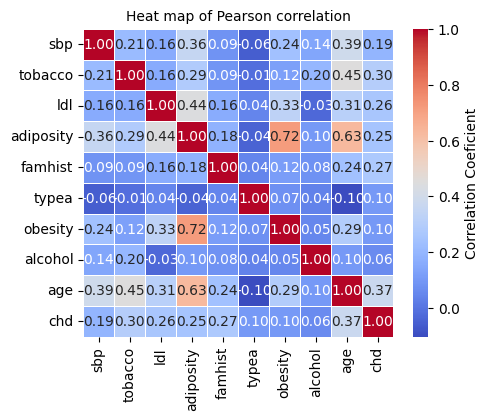

In [101]:
# Note: since the categorical feautures were encoded and only have two values (0 or 1)
# I decided to not removed from correlation

# 1. use correlation function of pandas to calculate correlatio using pearson method
correlation_matrix = mydata.corr(method='pearson')

# 2. plot the correlation matrix
plot_correlation_heat_map(correlation_matrix)

#### Entropy among features (TODO)